# Unos podataka

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

boston = load_boston()
print(boston.data.shape) 
print(boston.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [2]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Atribut (MEDV) imenujemo za ciljnu promenljivu
data['MEDV'] = pd.Series(data=boston.target, index=data.index)
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
X = data.drop('MEDV', axis = 1) #definišemo promenljive vrednosti koristeći atribute iz (data) bez ciljne promenljive (MEDV)
Y = data['MEDV'] #definišemo ciljnu promenljivu (MEDV)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# Linearna Regresija

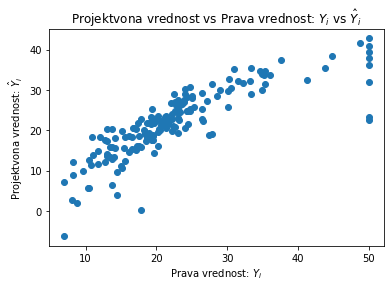

In [6]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
y_pred_train = lm.predict(X_train) #predikcije na trening skupu
y_pred_test = lm.predict(X_test) #predikcije na test skupu
# Skicirali smo projektovane Y (y-osa) u odnosu na prave Y (x-osa). Perfektno predviđanje bi bilo po dijagonali. Kako vidimo da je trend na dijagonali,to nam govori da smo dobro "fit-ovali".

plt.scatter(Y_test,y_pred_test)
plt.xlabel("Prava vrednost: $Y_i$")
plt.ylabel("Projektvona vrednost: $\hat{Y}_i$")
plt.title("Projektvona vrednost vs Prava vrednost: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [7]:
print('Intercept term: ',lm.intercept_)
print('Coefficients: \n',lm.coef_) 

Intercept term:  32.8589326340861
Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


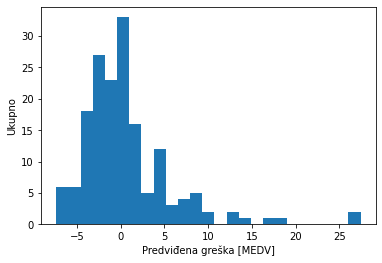

In [8]:
error = Y_test - y_pred_test
plt.hist(error, bins = 25)
plt.xlabel("Predviđena greška [MEDV]")
_ = plt.ylabel("Ukupno")

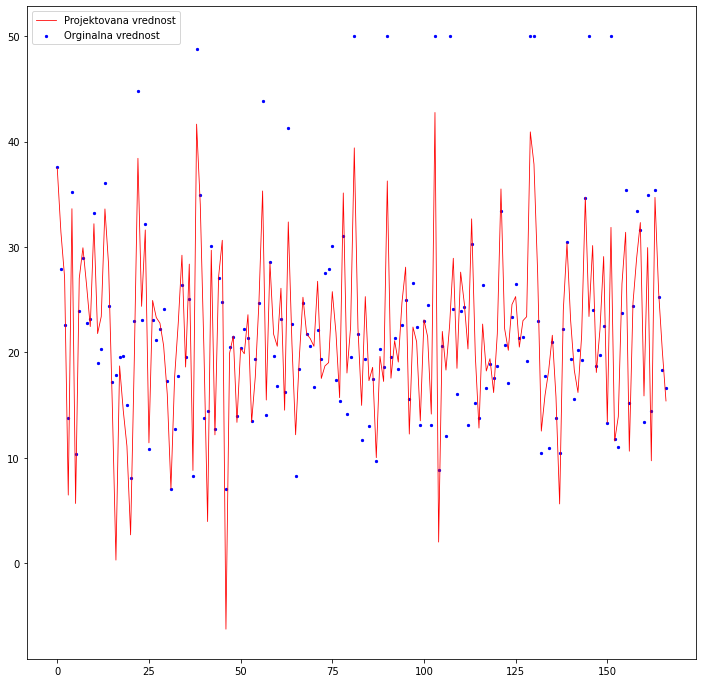

In [9]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# Least Angle Regression

In [10]:
lars = linear_model.Lars()
lars.fit(X_train,Y_train)
lars.coef_

array([-1.64104497e-01,  1.41987176e-02, -2.66729906e-01,  1.78078948e+00,
       -1.82392247e+01,  4.25346429e+00, -1.65276592e-02, -1.54987489e+00,
       -2.04990331e-01,  2.53729409e-02, -1.10918869e+00,  1.33155750e-02,
       -4.59120481e-01])

### Predviđanja LARS modela za trening i test skup

In [11]:
y_pred_train_lars = lars.predict(X_train)
y_pred_test_lars  = lars.predict(X_test)

In [12]:
print('R-square, Training, Linear Regression: ', r2_score(Y_train,y_pred_train)) #R^2_score linearne regresije na trening skupu
print('R-square, Testing, Linear Regression: ', r2_score(Y_test,y_pred_test)) #R^2_score linearne regresije na test skupu
print('R-square, Training, LARS: ', r2_score(Y_train,y_pred_train_lars)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS: ', r2_score(Y_test,y_pred_test_lars)) #R^2_score LARS na test skupu

R-square, Training, Linear Regression:  0.7551332741779998
R-square, Testing, Linear Regression:  0.6956551656111607
R-square, Training, LARS:  0.7034176197796838
R-square, Testing, LARS:  0.6410641382451695


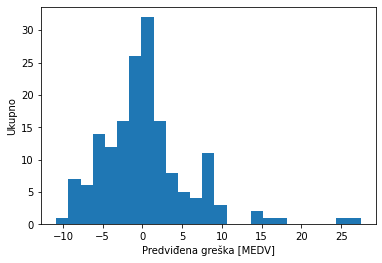

In [13]:
error = Y_test - y_pred_test_lars
plt.hist(error, bins = 25)
plt.xlabel("Predviđena greška [MEDV]")
_ = plt.ylabel("Ukupno")

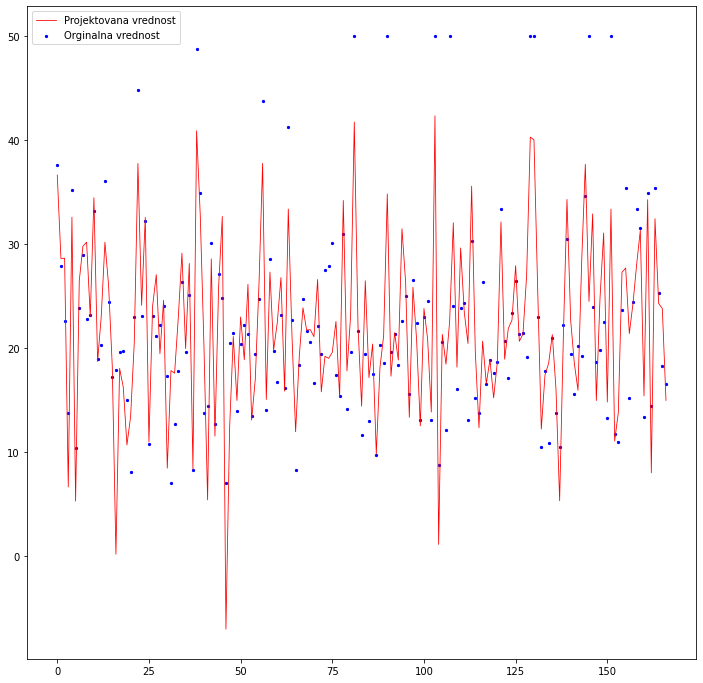

In [14]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test_lars, lw=0.8, color="red", label="Projektovana vrednost")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# Least Angle Regression -Lasso

In [15]:
lars_lasso = linear_model.LassoLars(alpha=.1)
lars_lasso.fit(X_train,Y_train)
lars_lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.89962271,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.51118683,  0.        , -0.45083438])

### Predviđanja LARS modela za trening i test skup

In [16]:
y_pred_train_lars_lasso = lars_lasso.predict(X_train)
y_pred_test_lars_lasso  = lars_lasso.predict(X_test)

In [17]:
print('R-square, Training, Linear Regression: ', r2_score(Y_train,y_pred_train)) #R^2_score linearne regresije na trening skupu
print('R-square, Testing, Linear Regression: ', r2_score(Y_test,y_pred_test)) #R^2_score linearne regresije na test skupu
print('R-square, Training, LARS: ', r2_score(Y_train,y_pred_train_lars)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS: ', r2_score(Y_test,y_pred_test_lars)) #R^2_score LARS na test skupu
print('R-square, Training, LARS-Lasso: ', r2_score(Y_train,y_pred_train_lars_lasso)) #R^2_score LARS na trening skupu
print('R-square, Testing, LARS-Lasso: ', r2_score(Y_test,y_pred_test_lars_lasso)) #R^2_score LARS na test skupu

R-square, Training, Linear Regression:  0.7551332741779998
R-square, Testing, Linear Regression:  0.6956551656111607
R-square, Training, LARS:  0.7034176197796838
R-square, Testing, LARS:  0.6410641382451695
R-square, Training, LARS-Lasso:  0.6304579252341709
R-square, Testing, LARS-Lasso:  0.5880436213681792


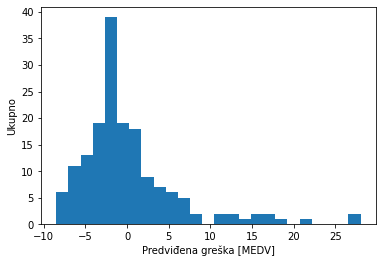

In [18]:
error = Y_test - y_pred_test_lars_lasso
plt.hist(error, bins = 25)
plt.xlabel("Predviđena greška [MEDV]")
_ = plt.ylabel("Ukupno")

#  

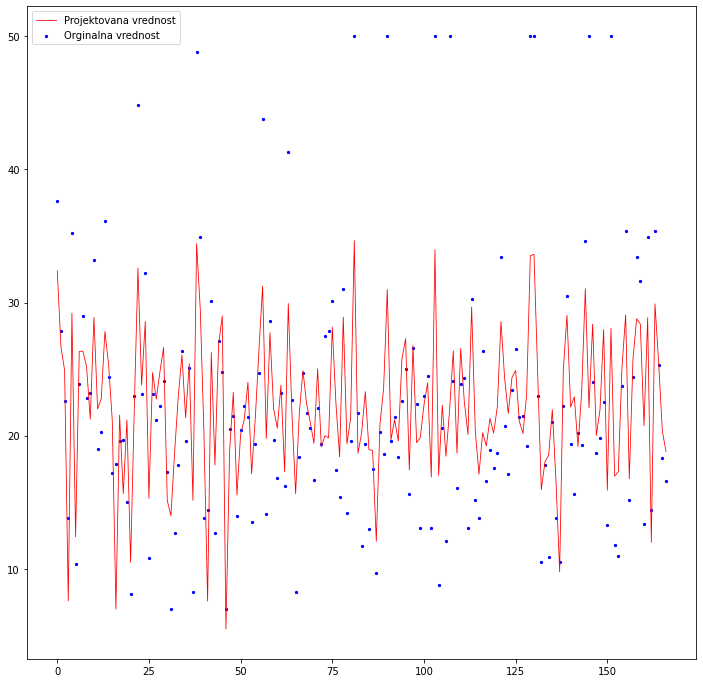

In [19]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_test_lars_lasso, lw=0.8, color="red", label="Projektovana vrednost")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# Vizuelizacija odnosa linearnog modela,LARS i LARS-Lasso

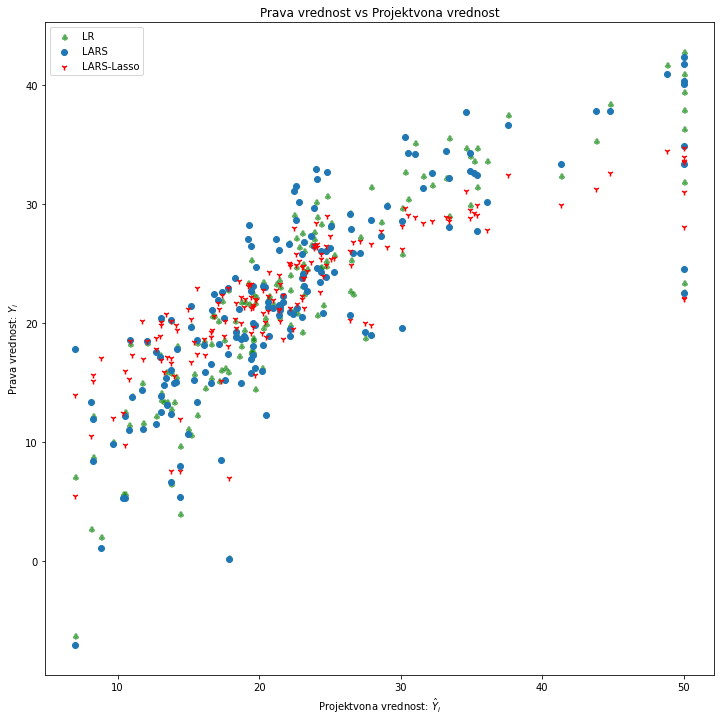

In [22]:
#ax = plt.axes()
#ax.set_facecolor("aqua")

#img = plt.imread("stat.jpg")
#fig, ax = plt.subplots()
#ax.imshow(img, extent=[0, 60, -5, 30])

plt.scatter(Y_test, y_pred_test, label='LR',c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.scatter(Y_test, y_pred_test_lars, label='LARS')
plt.scatter(Y_test, y_pred_test_lars_lasso,label='LARS-Lasso', c="r", marker="1")
plt.xlabel("Projektvona vrednost: $\hat{Y}_i$")
plt.ylabel("Prava vrednost: $Y_i$")
plt.title("Prava vrednost vs Projektvona vrednost")
plt.gcf().set_size_inches((12,12))
plt.legend(loc="best")
plt.show()